In [1]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df = pd.read_csv('./datasets/boston_housing.csv' , header=None , delimiter=r"\s+" , names=column_names)
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [4]:
import matplotlib.pyplot as plt

boston_sample =boston_df[['RM','MEDV' ]]
boston_sample = boston_sample.sample(n=100 , random_state=0)
len(boston_sample)

100

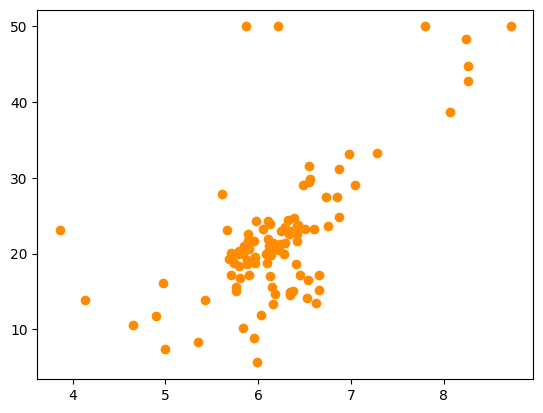

In [5]:
plt.figure()
plt.scatter(boston_sample['RM'] , boston_sample['MEDV'] , c='darkorange')

In [6]:
boston_sample

,RM,MEDV
329,6.333,22.6
371,6.216,50.0
219,6.373,23.0
403,5.349,8.3
78,6.232,21.2
...,...,...
246,6.108,24.3
374,4.138,13.8
56,6.383,24.7
455,6.525,14.1


In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr_reg = LinearRegression()
rf_reg3= DecisionTreeRegressor(max_depth=2)
rf_reg7= DecisionTreeRegressor(max_depth=7)

x_test = np.arange(4.5,8.5,0.04).reshape(-1,1)
x_tr=boston_sample.RM.values.reshape(-1,1)
y_tr=boston_sample.MEDV.values.reshape(-1,1)

lr_reg.fit(x_tr,y_tr)
rf_reg3.fit(x_tr,y_tr)
rf_reg7.fit(x_tr,y_tr)

pred_lr=lr_reg.predict(x_test)
pred_rf3=rf_reg3.predict(x_test)
pred_rf7=rf_reg7.predict(x_test)

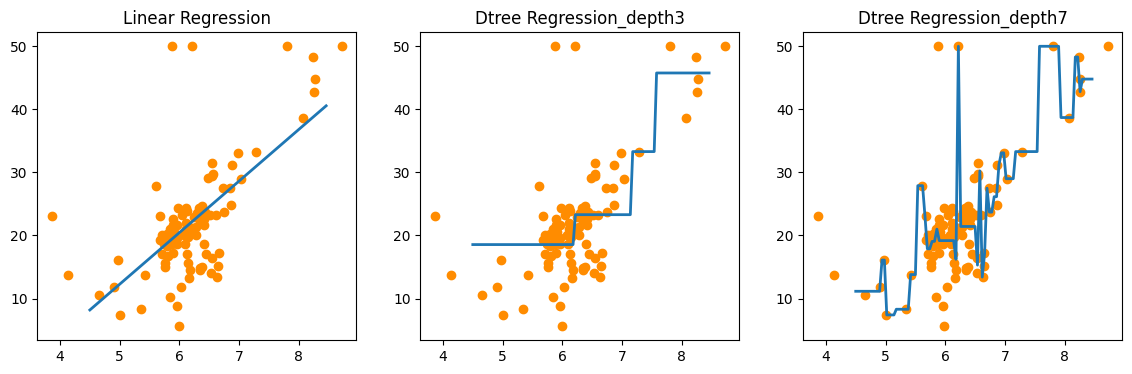

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(boston_sample.RM,boston_sample.MEDV, c="darkorange")
ax1.plot(x_test, pred_lr, label='linear',linewidth=2)

ax2.set_title('Dtree Regression_depth3')
ax2.scatter(boston_sample.RM,boston_sample.MEDV, c="darkorange")
ax2.plot(x_test, pred_rf3, label='max_3',linewidth=2)

ax3.set_title('Dtree Regression_depth7')
ax3.scatter(boston_sample.RM,boston_sample.MEDV, c="darkorange")
ax3.plot(x_test, pred_rf7, label='max_7',linewidth=2)